In [2]:
from pymcmcstat.MCMC import MCMC 
import pandas as pd
import numpy as np

mcstat = MCMC()

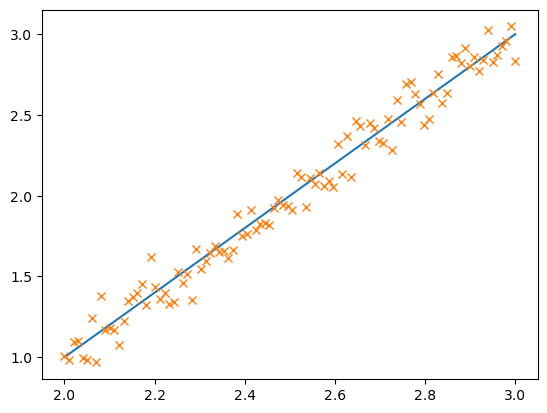

In [7]:
import matplotlib.pyplot as plt
nds = 100
x = np.linspace(2, 3, num=nds)
x = x.reshape(nds, 1)
m = 2
b = -3
noise = 0.1*np.random.standard_normal(x.shape) 
plt.plot(x, m*x + b)
y = m*x + b + noise
plt.plot(x, y, "x")

In [11]:
# initialize data structure
mcstat.data.add_data_set(x, y)# initialize parameter array
mcstat.parameters.add_model_parameter(name = 'm', theta0 = 1., minimum = -10, maximum = 10)
mcstat.parameters.add_model_parameter(name = 'b', theta0 = -5., minimum = -10, maximum = 100)

mcstat.simulation_options.define_simulation_options(nsimu = int(5.0e4), updatesigma = 1, method = 'dram', adaptint = 100, verbosity = 1, waitbar
= 1)

In [14]:
# define test model function
def test_modelfun(xdata, theta): 
    m = theta [0]
    b = theta [1]
    nrow, ncol = xdata.shape
    y = np.zeros([nrow ,1])
    y[:,0] = m*xdata.reshape(nrow ,) + b 
    return y

def test_ssfun(theta, data): 
    xdata = data.xdata[0]
    ydata = data.ydata[0]
    # eval model
    ymodel = test_modelfun(xdata, theta)
    # calc sos
    ss = sum (( ymodel [: ,0] - ydata [: ,0]) **2) 
    return ss

In [15]:
mcstat.model_settings.define_model_settings(sos_function = test_ssfun)

In [16]:
# Run mcmcrun
mcstat.run_simulation()


Sampling these parameters:
      name      start [      min,       max] N(       mu,   sigma^2)
         m:      1.00 [   -10.00,     10.00] N( 0.00e+00,      inf)
         b:     -5.00 [   -10.00,    100.00] N( 0.00e+00,      inf)
         m:      1.00 [   -10.00,     10.00] N( 0.00e+00,      inf)
         b:     -5.00 [   -10.00,    100.00] N( 0.00e+00,      inf)
 [-----------------100%-----------------] 50000 of 50000 complete in 4.8 sec

In [17]:
# Extract results
results = mcstat.simulation_results.results

/var/folders/pl/w3zkxkl91fl0j08xrh5r78hh0000gn/T/ipykernel_14477/3294148689.py:5: DeprecationWarning: Call to deprecated function (or staticmethod) plot_chain_panel. (New function:"from pymcmcstat.mcmcplot import plot_chain_panel") -- Deprecated since version 1.9.0.
  mcpl.plot_chain_panel(chain, names)


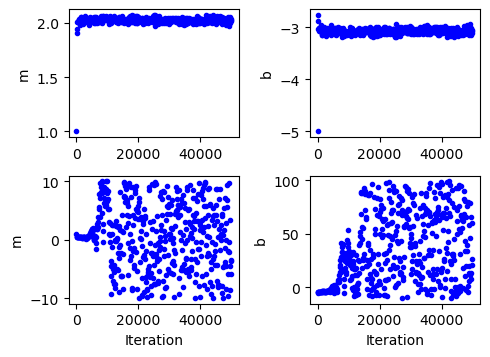

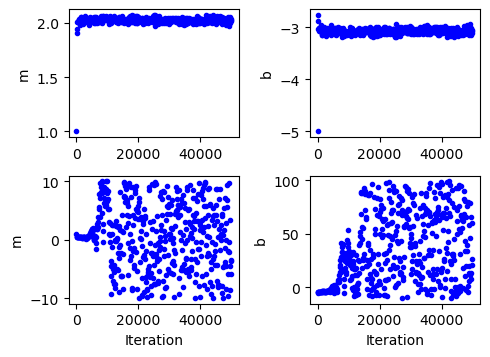

In [20]:
chain = results['chain'] 
names = results['names']
# generate mcmc plots
mcpl = mcstat.mcmcplot # initialize plotting methods
mcpl.plot_chain_panel(chain, names)



------------------------------
      name:      mean       std    MC_err       tau    geweke
         m:      2.03      0.02  6.30e-04     53.21      1.00
         b:     -3.07      0.05  1.58e-03     53.06      1.00
         m:      1.00      5.36      0.41    274.43      0.83
         b:     36.49     32.13      3.65   1142.83      0.01
------------------------------
Acceptance rate information
---------------
Results dictionary:
Stage 1: 2.72%
Stage 2: 25.20%
Net    : 27.92% -> 13960/50000
---------------
Chain provided:
Net    : 28.77% -> 13808/48000
---------------
Note, the net acceptance rate from the results dictionary
may be different if you only provided a subset of the chain,
e.g., removed the first part for burnin-in.
------------------------------


/var/folders/pl/w3zkxkl91fl0j08xrh5r78hh0000gn/T/ipykernel_14477/712331509.py:7: DeprecationWarning: Call to deprecated function (or staticmethod) plot_density_panel. (New function: "from pymcmcstat.mcmcplot import plot_density_panel") -- Deprecated since version 1.9.0.
  mcpl.plot_density_panel(chain[burnin:,:], names)
/var/folders/pl/w3zkxkl91fl0j08xrh5r78hh0000gn/T/ipykernel_14477/712331509.py:8: DeprecationWarning: Call to deprecated function (or staticmethod) plot_chain_panel. (New function:"from pymcmcstat.mcmcplot import plot_chain_panel") -- Deprecated since version 1.9.0.
  mcpl.plot_chain_panel(chain[burnin:,:], names)
/var/folders/pl/w3zkxkl91fl0j08xrh5r78hh0000gn/T/ipykernel_14477/712331509.py:9: DeprecationWarning: Call to deprecated function (or staticmethod) plot_pairwise_correlation_panel. (New function: "from pymcmcstat.mcmcplot import plot_pairwise_correlation_panel") -- Deprecated since version 1.9.0.
  mcpl.plot_pairwise_correlation_panel(chain[burnin:,:], names)


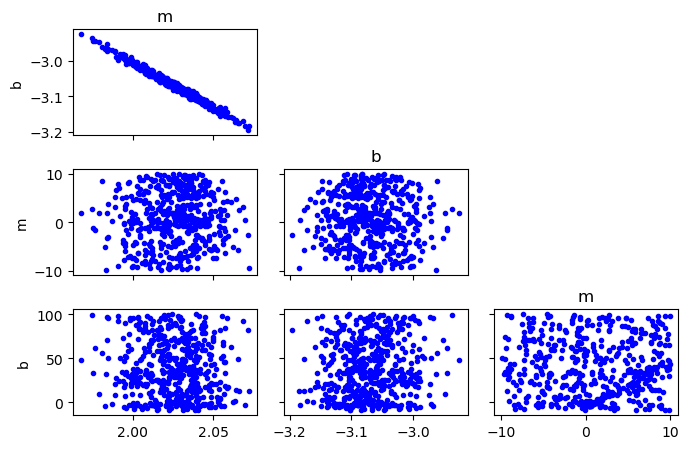

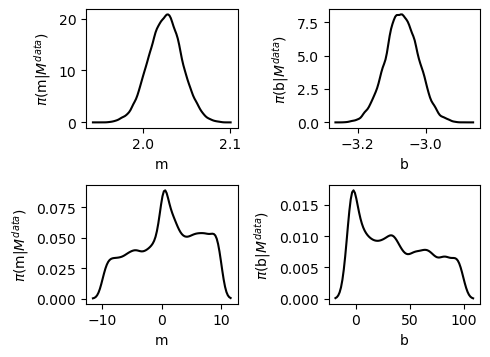

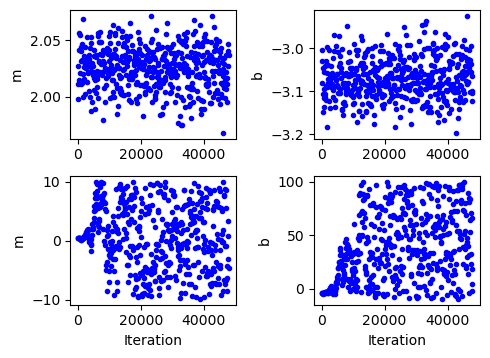

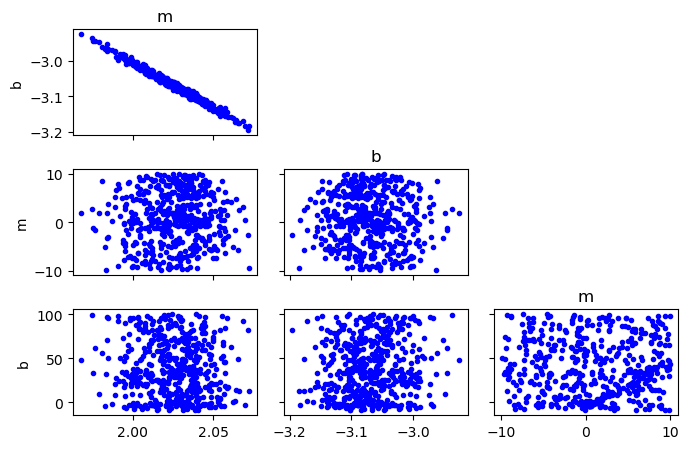

In [21]:
# define burnin
burnin = 2000
# display chain statistics
mcstat.chainstats(chain[burnin:,:], results)
# generate mcmc plots
mcpl = mcstat.mcmcplot # initialize plotting methods 
mcpl.plot_density_panel(chain[burnin:,:], names) 
mcpl.plot_chain_panel(chain[burnin:,:], names) 
mcpl.plot_pairwise_correlation_panel(chain[burnin:,:], names)